### Importing the librairies

In [3]:
from ultralytics import YOLO
import shutil
import os
from random import choice
import cv2
import matplotlib.pyplot as plt

### Preparing the traffic sign dataset

In [4]:
# arrays to store file names
imgs = []
xmls = []

# setup directory names
crs_path = "./raw_dataset"

train_ratio = 0.8
val_ratio = 0.2

# total count of imgs
total_img_count = len(os.listdir(crs_path))/2

# sorting count of imgs
for (dirname,dirs, files) in os.walk(crs_path):
#     print(files)
    for filename in files:
#         print("hello")
        if filename.endswith(".txt"):
            xmls.append(filename)
        else:
            imgs.append(filename)

# counting range for cycles
count_for_train = int(len(imgs)*train_ratio)
count_for_val = int(len(imgs)*val_ratio)
print("training images are : ",count_for_train)
print("validation images are : ",count_for_val)
print("total images are : ",len(imgs))

training images are :  592
validation images are :  148
total images are :  741


In [5]:
train_image_path = "./dataset/images/train"
train_label_path = "./dataset/labels/train"
val_image_path = "./dataset/images/val"
val_label_path = "./dataset/labels/val"

if not os.path.isdir(train_image_path):
    os.makedirs(train_image_path)
if not os.path.isdir(train_label_path):
    os.makedirs(train_label_path)
if not os.path.isdir(val_image_path):
    os.makedirs(val_image_path)
if not os.path.isdir(val_label_path):
    os.makedirs(val_label_path)

# cycle for train dir
for x in range(count_for_train):
    file_jpg = choice(imgs)
    file_xml = file_jpg[:-4] + ".txt"
    
    shutil.copy(os.path.join(crs_path,file_jpg),os.path.join(train_image_path,file_jpg))
    shutil.copy(os.path.join(crs_path,file_xml),os.path.join(train_label_path,file_xml))
    
    imgs.remove(file_jpg)
    xmls.remove(file_xml)
    
# cycle for test dir
for x in range(count_for_val):
    file_jpg = choice(imgs)
    file_xml = file_jpg[:-4] + ".txt"
    
    shutil.copy(os.path.join(crs_path,file_jpg),os.path.join(val_image_path,file_jpg))
    shutil.copy(os.path.join(crs_path,file_xml),os.path.join(val_label_path,file_xml))
    
    imgs.remove(file_jpg)
    xmls.remove(file_xml)

# rest of files
for x in imgs:
    file_jpg = x
    file_xml = file_jpg[:-4] + ".txt"
    
    shutil.copy(os.path.join(crs_path,file_jpg),os.path.join(val_image_path,file_jpg))
    shutil.copy(os.path.join(crs_path,file_xml),os.path.join(val_label_path,file_xml))

### Training the YoloV8 model on custom traffic signs dataset

In [6]:
# load model.pt
model = YOLO(model="model.pt")

In [14]:
# Train using gpu
model.train(data='./dataset/dataset.yaml', epochs=3)
metrics = model.val()

Ultralytics 8.3.85  Python-3.11.11 torch-2.6.0+cpu CPU (12th Gen Intel Core(TM) i7-12650H)
engine\trainer: task=detect, mode=train, model=model.pt, data=./dataset/dataset.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_bo

train: Scanning C:\Users\bouhe\Desktop\M2\S2\ComputerVision\Jetpro\Trafic-Sign-Recognition-main\dataset\labels\train.cache... 741 images, 0 backgrounds, 0 corrupt: 100%|██████████| 741/741 [00:00<?, ?it/s]

train: WARNING  C:\Users\bouhe\Desktop\M2\S2\ComputerVision\Jetpro\Trafic-Sign-Recognition-main\dataset\images\train\00340.jpg: 1 duplicate labels removed



val: Scanning C:\Users\bouhe\Desktop\M2\S2\ComputerVision\Jetpro\Trafic-Sign-Recognition-main\dataset\labels\val... 716 images, 0 backgrounds, 0 corrupt: 100%|██████████| 716/716 [00:01<00:00, 685.53it/s]

val: WARNING  C:\Users\bouhe\Desktop\M2\S2\ComputerVision\Jetpro\Trafic-Sign-Recognition-main\dataset\images\val\00340.jpg: 1 duplicate labels removed
val: New cache created: C:\Users\bouhe\Desktop\M2\S2\ComputerVision\Jetpro\Trafic-Sign-Recognition-main\dataset\labels\val.cache
Plotting labels to runs\detect\train3\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train3
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G      1.131      1.708     0.8767         15        640: 100%|██████████| 47/47 [02:35<00:00,  3.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:35<00:00,  1.55s/it]

                   all        716       1172      0.831      0.658      0.765      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3         0G      1.127      1.642     0.8754          9        640: 100%|██████████| 47/47 [02:26<00:00,  3.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:35<00:00,  1.55s/it]

                   all        716       1172      0.882      0.678      0.788      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3         0G      1.094      1.483      0.871         15        640: 100%|██████████| 47/47 [02:27<00:00,  3.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:35<00:00,  1.55s/it]

                   all        716       1172      0.855      0.713       0.81      0.579



3 epochs completed in 0.155 hours.
Optimizer stripped from runs\detect\train3\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train3\weights\best.pt, 6.2MB

Validating runs\detect\train3\weights\best.pt...
Ultralytics 8.3.85  Python-3.11.11 torch-2.6.0+cpu CPU (12th Gen Intel Core(TM) i7-12650H)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:30<00:00,  1.32s/it]


                   all        716       1172      0.855      0.713       0.81      0.579
           speed limit        370        544      0.869      0.821      0.904      0.663
                 yield        170        210      0.976      0.767      0.885      0.639
             mandatory        136        157      0.807      0.637      0.728      0.518
                 other        206        261      0.767      0.628      0.723      0.496
Speed: 0.7ms preprocess, 32.5ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs\detect\train3
Ultralytics 8.3.85  Python-3.11.11 torch-2.6.0+cpu CPU (12th Gen Intel Core(TM) i7-12650H)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning C:\Users\bouhe\Desktop\M2\S2\ComputerVision\Jetpro\Trafic-Sign-Recognition-main\dataset\labels\val.cache... 716 images, 0 backgrounds, 0 corrupt: 100%|██████████| 716/716 [00:00<?, ?it/s]

val: WARNING  C:\Users\bouhe\Desktop\M2\S2\ComputerVision\Jetpro\Trafic-Sign-Recognition-main\dataset\images\val\00340.jpg: 1 duplicate labels removed



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:28<00:00,  1.56it/s]


                   all        716       1172      0.855      0.713       0.81      0.579
           speed limit        370        544      0.869      0.821      0.904      0.663
                 yield        170        210      0.976      0.767      0.885      0.639
             mandatory        136        157      0.807      0.637      0.728      0.518
                 other        206        261      0.767      0.628      0.723      0.496
Speed: 0.5ms preprocess, 30.3ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs\detect\train32


In [18]:
# Save the model as "model.pt"
model.save("model.pt")

### Test the model on new traffic signs

In [12]:
# Run batched inference on a list of images
results = model(['./dataset/images/val/00004.jpg',
                  './dataset/images/val/00026.jpg',
                  './dataset/images/val/00052.jpg',
                  './dataset/images/val/00075.jpg',
                  './dataset/images/val/00107.jpg',
                  './dataset/images/val/00124.jpg',
                  './dataset/images/val/00165.jpg'])

# Process results list
for i, result in enumerate(results):
    result.save(filename='result_'+str(i)+'.jpg')  # save to disk


0: 384x640 1 speed limit, 1 yield, 1 mandatory, 46.9ms
1: 384x640 1 speed limit, 46.9ms
2: 384x640 1 speed limit, 1 mandatory, 2 others, 46.9ms
3: 384x640 1 speed limit, 1 yield, 46.9ms
4: 384x640 1 speed limit, 1 yield, 46.9ms
5: 384x640 2 speed limits, 46.9ms
6: 384x640 1 yield, 46.9ms
Speed: 3.2ms preprocess, 46.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


### Display the images

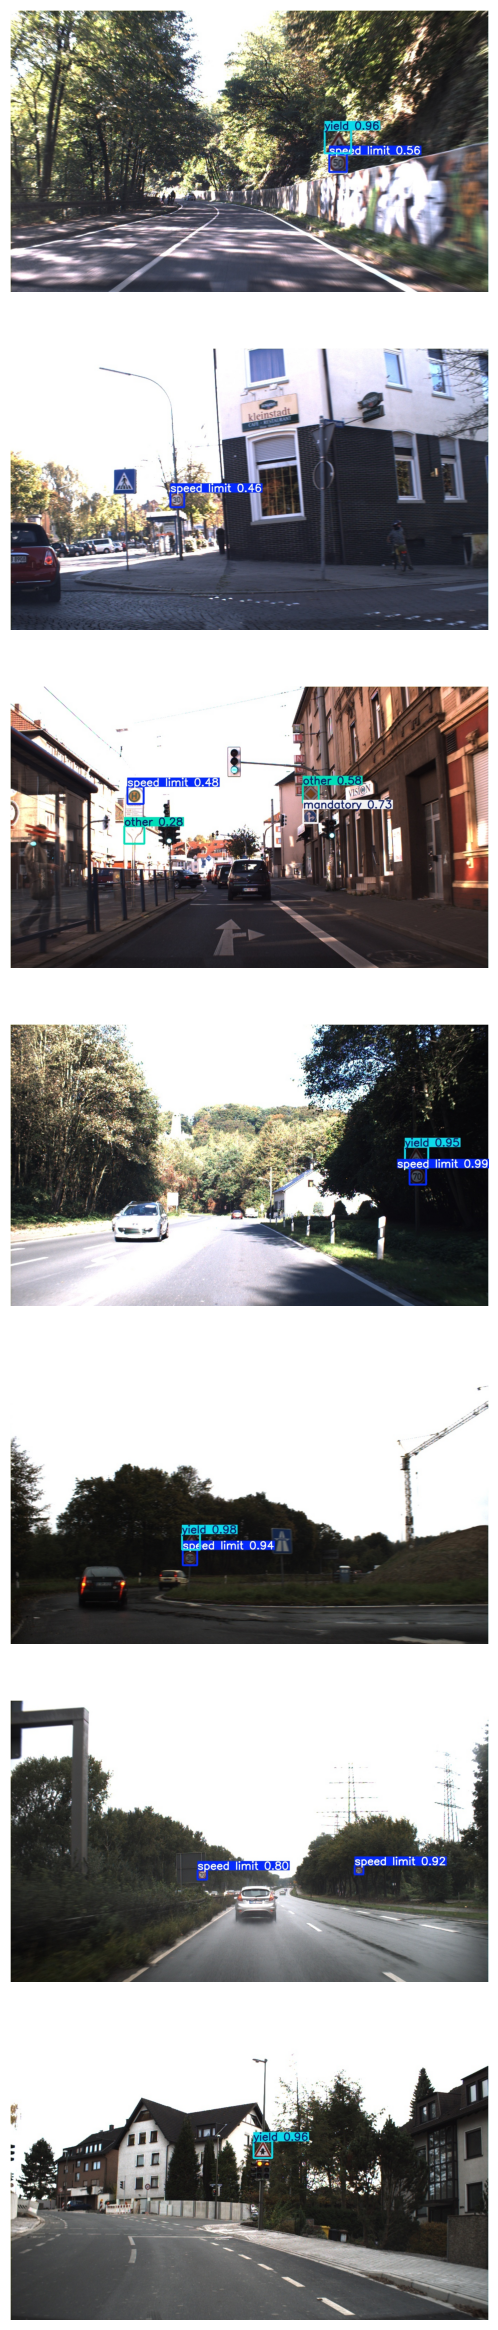

In [19]:
image1 = cv2.imread("result_0.jpg")
image2 = cv2.imread("result_1.jpg")
image3 = cv2.imread("result_2.jpg")
image4 = cv2.imread("result_3.jpg")
image5 = cv2.imread("result_4.jpg")
image6 = cv2.imread("result_5.jpg")
image7 = cv2.imread("result_6.jpg")

fig, ax = plt.subplots(7, 1, figsize=(30, 30))
ax[0].imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
ax[2].imshow(cv2.cvtColor(image3, cv2.COLOR_BGR2RGB))
ax[3].imshow(cv2.cvtColor(image4, cv2.COLOR_BGR2RGB))
ax[4].imshow(cv2.cvtColor(image5, cv2.COLOR_BGR2RGB))
ax[5].imshow(cv2.cvtColor(image6, cv2.COLOR_BGR2RGB))
ax[6].imshow(cv2.cvtColor(image7, cv2.COLOR_BGR2RGB))
for ax in ax:
    ax.axis('off')
plt.show()